# Telco Customer Churn Prediction

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop("customerID",axis="columns",inplace=True)

In [6]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [7]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod TotalCharges Churn  
0              Electronic check        29.85    No  
1                  Mailed check       1889.5    No  
2                  Mailed check       108.15   Yes  
3     Bank transfer (automatic)      1840.75    No  
4              Electronic check       151.65   Yes  
...                         ...          ...   ...  
7038               Mailed check       1990.5    No  
7039    Credit card (automatic)       7362.9    No  
7040           Electronic check       346.45    No  
7041               Mailed check        306.6   Yes  
7042  Bank transfer (automatic)       6844.5    No  

[7043 rows x 17 columns]

In [8]:
df[df["TotalCharges"]==" "]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [9]:
df["TotalCharges"].dtype

dtype('O')

In [10]:
df['TotalCharges'].value_counts().sort_index()

TotalCharges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6531, dtype: int64

In [11]:
df['TotalCharges']=np.where(df['TotalCharges']==" ",np.nan,df['TotalCharges'])
df['TotalCharges'].value_counts().sort_index()

TotalCharges
100.2     1
100.25    1
100.35    1
100.4     1
100.8     1
         ..
997.75    1
998.1     1
999.45    1
999.8     1
999.9     1
Name: count, Length: 6530, dtype: int64

In [12]:
df['TotalCharges'].isna().sum()
df['TotalCharges']=df['TotalCharges'].apply(float)

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df["TotalCharges"].mean())
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 16 columns]

In [15]:
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

In [16]:
d=df[df["Churn"]=="Yes"]['gender'].value_counts().to_frame().reset_index()
d

gender  count
0  Female    939
1    Male    930

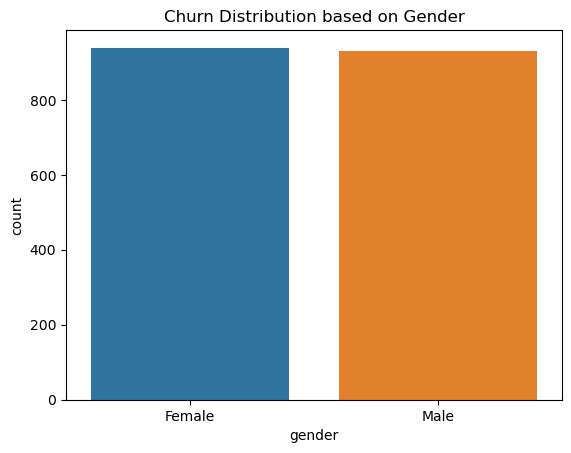

In [17]:
sns.barplot(x="gender",y='count',data=d,hue="gender")
plt.title("Churn Distribution based on Gender")
plt.show()

In [18]:
d=df[df["Churn"]=="Yes"]["Contract"].value_counts().to_frame().reset_index()
d

Contract  count
0  Month-to-month   1655
1        One year    166
2        Two year     48

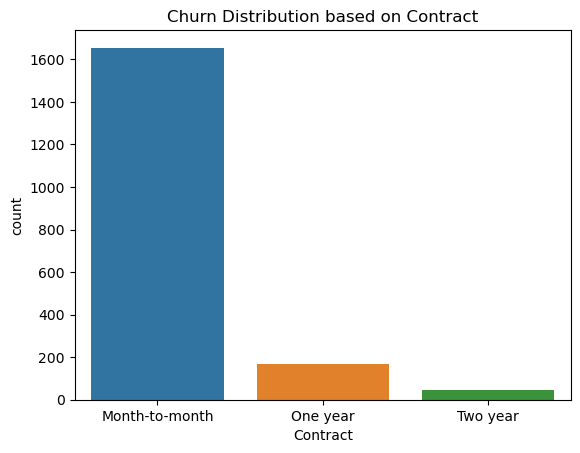

In [19]:
sns.barplot(x="Contract",y='count',data=d,hue="Contract")
plt.title("Churn Distribution based on Contract")
plt.show()

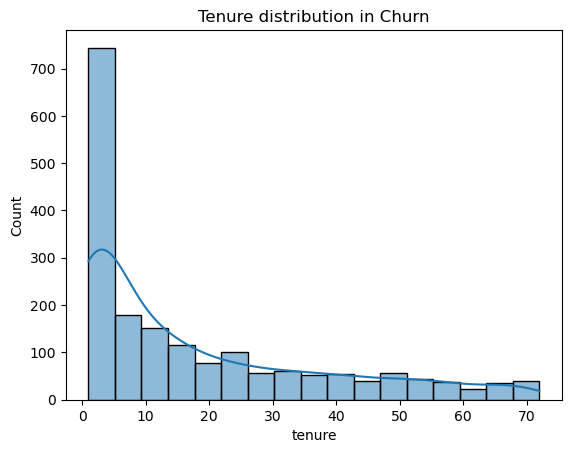

In [20]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="tenure",kde=True)
plt.title("Tenure distribution in Churn")
plt.show()

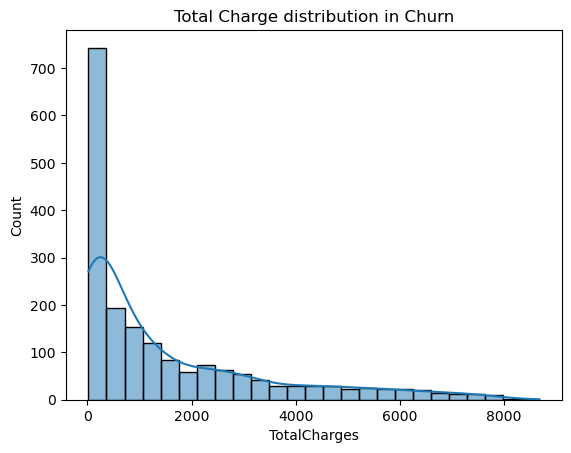

In [21]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="TotalCharges",kde=True)
plt.title("Total Charge distribution in Churn")
plt.show()

In [22]:
d=df[df["Churn"]=="Yes"]["Partner"].value_counts().to_frame().reset_index()
d

Partner  count
0      No   1200
1     Yes    669

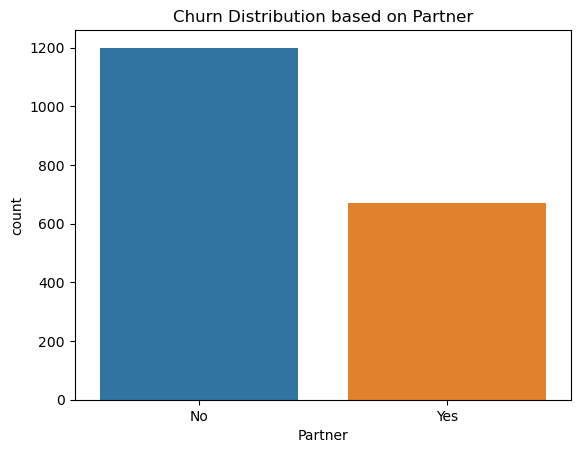

In [23]:
sns.barplot(x="Partner",y='count',data=d,hue="Partner")
plt.title("Churn Distribution based on Partner")
plt.show()

In [24]:
d=df[df["Churn"]=="Yes"]["SeniorCitizen"].value_counts().to_frame().reset_index()
d

SeniorCitizen  count
0              0   1393
1              1    476

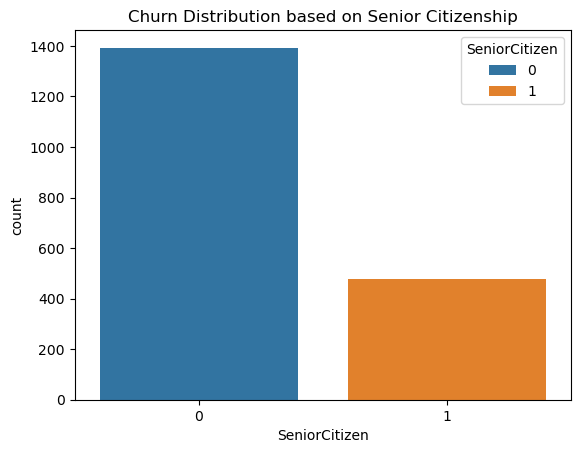

In [25]:
sns.barplot(x="SeniorCitizen",y='count',data=d,hue="SeniorCitizen")
plt.title("Churn Distribution based on Senior Citizenship")
plt.show()

In [26]:
d=df[df["Churn"]=="Yes"]["Dependents"].value_counts().to_frame().reset_index()
d

Dependents  count
0         No   1543
1        Yes    326

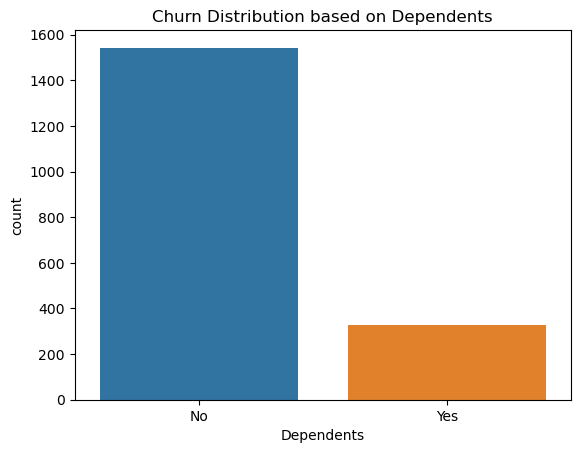

In [27]:
sns.barplot(x="Dependents",y='count',data=d,hue="Dependents")
plt.title("Churn Distribution based on Dependents")
plt.show()

In [28]:
yes_map={"No":0,"Yes":1}

for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
--
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
--
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
--
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
--
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Na

In [29]:
for aa in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[aa]=df[aa].replace({"No internet service":"No"})

In [30]:
for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
--
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
--
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
--
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
--
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
--
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
--
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [31]:
df['gender']=df['gender'].map({"Female":0,"Male":1})

In [32]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [33]:
len(df)

7043

In [34]:
df['MultipleLines']=df["MultipleLines"].replace({"No phone service":"No"})

In [35]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [36]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [37]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [38]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

Partner Dependents PhoneService MultipleLines InternetService  \
0        Yes         No           No            No             DSL   
1         No         No          Yes            No             DSL   
2         No         No          Yes            No             DSL   
3         No         No           No            No             DSL   
4         No         No          Yes            No     Fiber optic   
...      ...        ...          ...           ...             ...   
7038     Yes        Yes          Yes           Yes             DSL   
7039     Yes        Yes          Yes           Yes     Fiber optic   
7040     Yes        Yes           No            No             DSL   
7041     Yes         No          Yes           Yes     Fiber optic   
7042      No         No          Yes            No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
0                 No  Month-to-month              Yes   
1                 No        One year               No   
2                 No  Month-to-month              Yes   
3                 No        One year               No   
4                 No  Month-to-month              Yes   
...              ...             ...              ...   
7038             Yes        One year              Yes   
7039             Yes        One year              Yes   
7040              No  Month-to-month              Yes   
7041              No  Month-to-month              Yes   
7042             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 15 columns]

In [39]:
cat_col

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [40]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

Partner Dependents PhoneService MultipleLines InternetService  \
0        Yes         No           No            No             DSL   
1         No         No          Yes            No             DSL   
2         No         No          Yes            No             DSL   
3         No         No           No            No             DSL   
4         No         No          Yes            No     Fiber optic   
...      ...        ...          ...           ...             ...   
7038     Yes        Yes          Yes           Yes             DSL   
7039     Yes        Yes          Yes           Yes     Fiber optic   
7040     Yes        Yes           No            No             DSL   
7041     Yes         No          Yes           Yes     Fiber optic   
7042      No         No          Yes            No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
0                 No  Month-to-month              Yes   
1                 No        One year               No   
2                 No  Month-to-month              Yes   
3                 No        One year               No   
4                 No  Month-to-month              Yes   
...              ...             ...              ...   
7038             Yes        One year              Yes   
7039             Yes        One year              Yes   
7040              No  Month-to-month              Yes   
7041              No  Month-to-month              Yes   
7042             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 15 columns]

## Scaling and Encoding Features

In [41]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

for a in ['InternetService', 'Contract', 'PaymentMethod']:
    df[a]=lab.fit_transform(df[[a]])

df

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0          0              0     Yes         No       1           No   
1          1              0      No         No      34          Yes   
2          1              0      No         No       2          Yes   
3          1              0      No         No      45           No   
4          0              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038       1              0     Yes        Yes      24          Yes   
7039       0              0     Yes        Yes      72          Yes   
7040       0              0     Yes        Yes      11           No   
7041       1              1     Yes         No       4          Yes   
7042       1              0      No         No      66          Yes   

     MultipleLines  InternetService OnlineSecurity OnlineBackup  \
0               No                0             No          Yes   
1               No                0            Yes           No   
2               No                0            Yes          Yes   
3               No                0            Yes           No   
4               No                1             No           No   
...            ...              ...            ...          ...   
7038           Yes                0            Yes           No   
7039           Yes                1             No          Yes   
7040            No                0            Yes           No   
7041           Yes                1             No           No   
7042            No                1            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
0                  No          No          No              No         0   
1                 Yes          No          No              No         1   
2                  No          No          No              No         0   
3                 Yes         Yes          No              No         1   
4                  No          No          No              No         0   
...               ...         ...         ...             ...       ...   
7038              Yes         Yes         Yes             Yes         1   
7039              Yes          No         Yes             Yes         1   
7040               No          No          No              No         0   
7041               No          No          No              No         0   
7042              Yes         Yes         Yes             Yes         2   

     PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                 Yes              2           29.85         29.85    No  
1                  No              3           56.95       1889.50    No  
2                 Yes              3           53.85        108.15   Yes  
3                  No              0           42.30       1840.75    No  
4                 Yes              2           70.70        151.65   Yes  
...               ...            ...             ...           ...   ...  
7038              Yes              3           84.80       1990.50    No  
7039              Yes              1          103.20       7362.90    No  
7040              Yes              2           29.60        346.45    No  
7041              Yes              3           74.40        306.60   Yes  
7042              Yes              0          105.65       6844.50    No  

[7043 rows x 20 columns]

In [42]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

Partner Dependents PhoneService MultipleLines OnlineSecurity  \
0        Yes         No           No            No             No   
1         No         No          Yes            No            Yes   
2         No         No          Yes            No            Yes   
3         No         No           No            No            Yes   
4         No         No          Yes            No             No   
...      ...        ...          ...           ...            ...   
7038     Yes        Yes          Yes           Yes            Yes   
7039     Yes        Yes          Yes           Yes             No   
7040     Yes        Yes           No            No            Yes   
7041     Yes         No          Yes           Yes             No   
7042      No         No          Yes            No            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

     PaperlessBilling Churn  
0                 Yes    No  
1                  No    No  
2                 Yes   Yes  
3                  No    No  
4                 Yes   Yes  
...               ...   ...  
7038              Yes    No  
7039              Yes    No  
7040              Yes    No  
7041              Yes   Yes  
7042              Yes    No  

[7043 rows x 12 columns]

In [43]:
for aa in cat_col:
    df[aa]=df[aa].map(yes_map)

df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              0                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [44]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [46]:
x=df.drop("Churn",axis="columns")
y=df['Churn']

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

for a in x.columns:
    x[a]=scale.fit_transform(x[[a]])

x

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.340876      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.870241     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.155283      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.369379      0.327438   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0         -0.854176        -1.183234       -0.633933      1.378241   
1         -0.854176        -1.183234        1.577454     -0.725563   
2         -0.854176        -1.183234        1.577454      1.378241   
3         -0.854176        -1.183234        1.577454     -0.725563   
4         -0.854176         0.172250       -0.633933     -0.725563   
...             ...              ...             ...           ...   
7038       1.170719        -1.183234        1.577454     -0.725563   
7039       1.170719         0.172250       -0.633933      1.378241   
7040      -0.854176        -1.183234        1.577454     -0.725563   
7041       1.170719         0.172250       -0.633933     -0.725563   
7042      -0.854176         0.172250        1.577454     -0.725563   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
1             1.381277    -0.639439    -0.790132        -0.796070  0.371271   
2            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
3             1.381277     1.563872    -0.790132        -0.796070  0.371271   
4            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
...                ...          ...          ...              ...       ...   
7038          1.381277     1.563872     1.265612         1.256171  0.371271   
7039          1.381277    -0.639439     1.265612         1.256171  0.371271   
7040         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
7041         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
7042          1.381277     1.563872     1.265612         1.256171  1.570749   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0             0.829798       0.398558       -1.160323     -0.994971  
1            -1.205113       1.334863       -0.259629     -0.173876  
2             0.829798       1.334863       -0.362660     -0.960399  
3            -1.205113      -1.474052       -0.746535     -0.195400  
4             0.829798       0.398558        0.197365     -0.941193  
...                ...            ...             ...           ...  
7038          0.829798       1.334863        0.665992     -0.129281  
7039          0.829798      -0.537747        1.277533      2.242808  
7040          0.829798       0.398558       -1.168632     -0.855182  
7041          0.829798       1.334863        0.320338     -0.872777  
7042          0.829798      -1.474052        1.358961      2.013917  

[7043 rows x 19 columns]

In [48]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,stratify=y)

In [50]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    3880
 1    1402
 Name: count, dtype: int64,
 Churn
 0    1294
 1     467
 Name: count, dtype: int64)

In [51]:
x_train

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
2171 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
4906 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
1293  0.990532      -0.439916  1.034530    1.529024  1.410099      0.327438   
6243 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
1030 -1.009559      -0.439916  1.034530    1.529024  0.717853      0.327438   
...        ...            ...       ...         ...       ...           ...   
6633 -1.009559      -0.439916 -0.966622   -0.654012 -1.277445      0.327438   
6443 -1.009559      -0.439916 -0.966622   -0.654012 -0.951682      0.327438   
1181  0.990532       2.273159 -0.966622   -0.654012 -0.463037      0.327438   
3659  0.990532      -0.439916  1.034530   -0.654012  1.410099      0.327438   
1847 -1.009559      -0.439916  1.034530    1.529024  0.921455      0.327438   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2171      -0.854176        -1.183234       -0.633933     -0.725563   
4906       1.170719         0.172250        1.577454      1.378241   
1293       1.170719         0.172250       -0.633933      1.378241   
6243       1.170719        -1.183234        1.577454      1.378241   
1030      -0.854176         0.172250       -0.633933     -0.725563   
...             ...              ...             ...           ...   
6633       1.170719         0.172250       -0.633933     -0.725563   
6443      -0.854176         1.527734       -0.633933     -0.725563   
1181      -0.854176        -1.183234       -0.633933     -0.725563   
3659       1.170719         0.172250        1.577454      1.378241   
1847      -0.854176         1.527734       -0.633933     -0.725563   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2171          1.381277    -0.639439    -0.790132         1.256171 -0.828207   
4906         -0.723968    -0.639439     1.265612        -0.796070  1.570749   
1293          1.381277     1.563872     1.265612         1.256171  1.570749   
6243          1.381277    -0.639439     1.265612         1.256171  1.570749   
1030         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
...                ...          ...          ...              ...       ...   
6633         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
6443         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
1181          1.381277    -0.639439     1.265612        -0.796070 -0.828207   
3659          1.381277    -0.639439     1.265612         1.256171  0.371271   
1847         -0.723968    -0.639439    -0.790132        -0.796070  1.570749   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
2171         -1.205113       0.398558       -0.130009     -0.958964  
4906          0.829798      -1.474052        1.034911      2.062331  
1293          0.829798      -1.474052        1.543421      2.316941  
6243          0.829798      -0.537747        0.626109      1.623073  
1030          0.829798      -1.474052        0.165791      0.562689  
...                ...            ...             ...           ...  
6633          0.829798       0.398558        0.323662     -0.975257  
6443         -1.205113      -1.474052       -1.504315     -0.941767  
1181          0.829798      -1.474052       -0.156598     -0.462351  
3659         -1.205113      -0.537747        1.500214      2.229341  
1847         -1.205113      -0.537747       -1.507638     -0.529972  

[5282 rows x 19 columns]

## Oversampling minority class

In [52]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)


In [53]:
print(f"before {len(x_train)} , after {len(x_train_sm)}")

before 5282 , after 7760


In [54]:
y_train.value_counts()

Churn
0    3880
1    1402
Name: count, dtype: int64

In [55]:
y_train_sm.value_counts()

Churn
0    3880
1    3880
Name: count, dtype: int64

In [56]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

xgb.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [58]:
y_sample=xgb.predict_proba(x_test)[:,1]

roc_auc_score(y_test,y_sample)

0.8178729699585305

In [59]:
y_sample=xgb.predict(x_test)
accuracy_score(y_test,y_sample)

0.7802385008517888

In [60]:
x_train_sm.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Extracting Importance of features

In [61]:
xgb.feature_importances_

array([0.02415478, 0.01634564, 0.0234873 , 0.02690117, 0.02835773,
       0.04457092, 0.03939594, 0.06417618, 0.03897364, 0.02766895,
       0.02223816, 0.03764069, 0.02523666, 0.01955747, 0.42110783,
       0.03973111, 0.06368998, 0.02200124, 0.01476468], dtype=float32)

In [62]:
imp=pd.DataFrame({"importance":xgb.feature_importances_,"columns":x_train_sm.columns}).sort_values(by="importance",ascending=False)
imp

importance           columns
14    0.421108          Contract
7     0.064176   InternetService
16    0.063690     PaymentMethod
5     0.044571      PhoneService
15    0.039731  PaperlessBilling
6     0.039396     MultipleLines
8     0.038974    OnlineSecurity
11    0.037641       TechSupport
4     0.028358            tenure
9     0.027669      OnlineBackup
3     0.026901        Dependents
12    0.025237       StreamingTV
0     0.024155            gender
2     0.023487           Partner
10    0.022238  DeviceProtection
17    0.022001    MonthlyCharges
13    0.019557   StreamingMovies
1     0.016346     SeniorCitizen
18    0.014765      TotalCharges

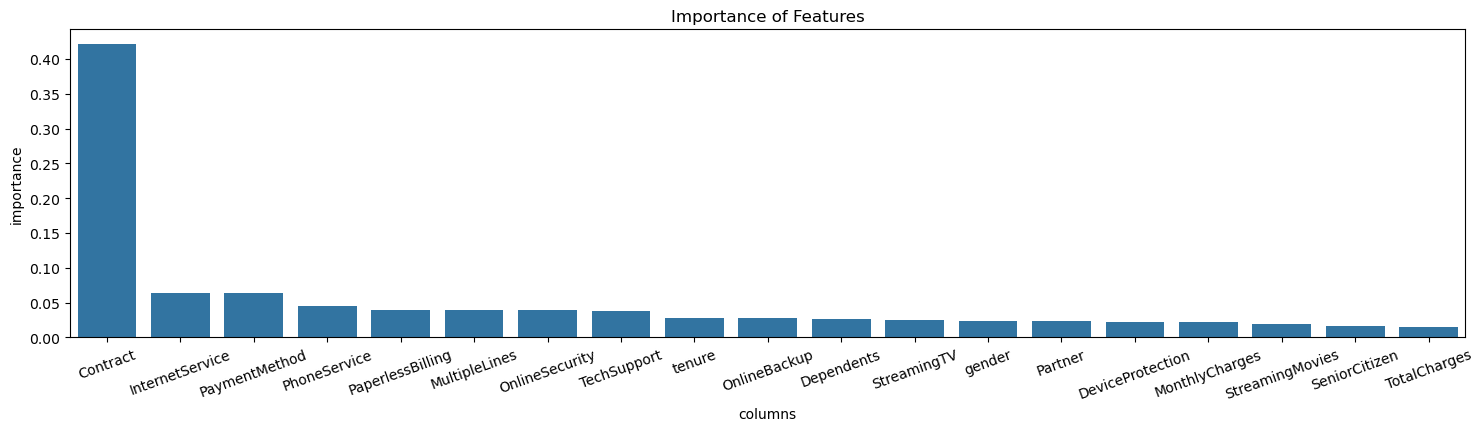

In [63]:
plt.figure(figsize=(18,4))
sns.barplot(x=imp['columns'],y=imp['importance'])
plt.title("Importance of Features")
plt.xticks(rotation=20)
plt.show()

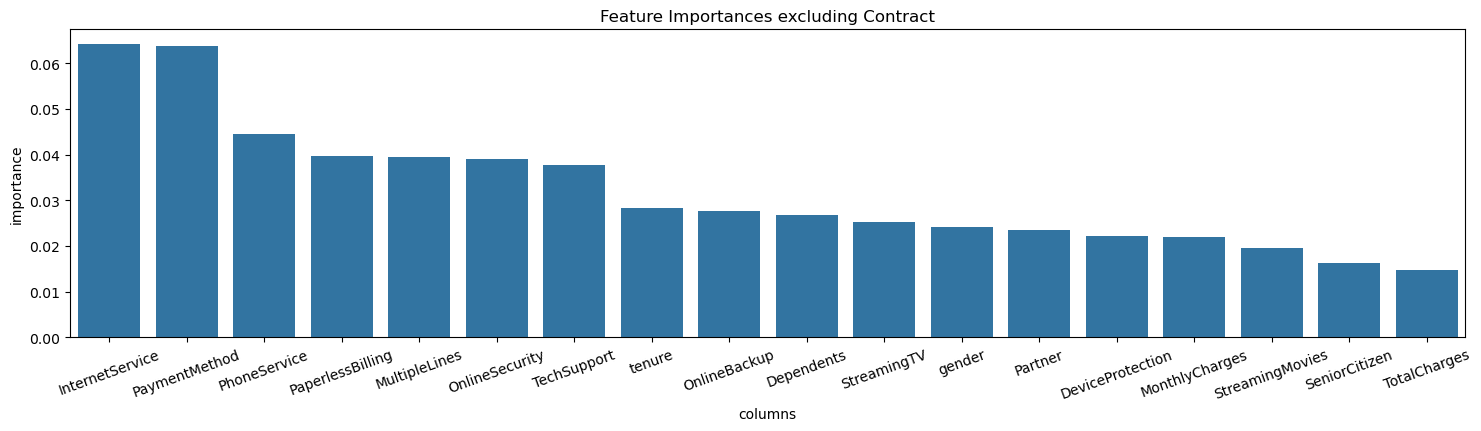

In [64]:
plt.figure(figsize=(18,4))
sns.barplot(x='columns',y='importance',data=imp[imp['columns']!="Contract"])
plt.xticks(rotation=20)
plt.title("Feature Importances excluding Contract")
plt.show()

In [65]:
imp[imp["importance"]>imp['importance'].median()] # selected median to get top max features

importance           columns
14    0.421108          Contract
7     0.064176   InternetService
16    0.063690     PaymentMethod
5     0.044571      PhoneService
15    0.039731  PaperlessBilling
6     0.039396     MultipleLines
8     0.038974    OnlineSecurity
11    0.037641       TechSupport
4     0.028358            tenure

In [66]:
len(imp)

19

In [67]:
imp['columns'][:9]

14            Contract
7      InternetService
16       PaymentMethod
5         PhoneService
15    PaperlessBilling
6        MultipleLines
8       OnlineSecurity
11         TechSupport
4               tenure
Name: columns, dtype: object

In [68]:
# Iterative based ROC-AUC Score comparisions to select max no of features having high ROC_AUC_scores
for g in range (9,len(imp),2):
    print(f"first {g} columns")
    features=imp['columns'].values[:g]
    x_train_feature=x_train_sm[features]
    x_test_feature=x_test[features]

    xgb.fit(x_train_feature,y_train_sm)

    y_feature=xgb.predict_proba(x_test_feature)[:,1]
    print(roc_auc_score(y_test,y_feature))

first 9 columns
0.8259120500150589
first 11 columns
0.8238749755915128
first 13 columns
0.8227430837103549
first 15 columns
0.8111420193348315
first 17 columns
0.821550791165948


In [69]:
# For top 9 features the ROC_AUC_score ia max so selecting top 9 columns
features=imp['columns'].values[:9]
x_train_feature=x_train_sm[features]
x_test_feature=x_test[features]

# Model Training

In [70]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [71]:
def all_models(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    # Handle models that provide probas vs decision scores
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(x_test)[:, 1]
    else:
        y_score = classifier.decision_function(x_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    print("Accuracy score:", acc)
    print("AUC score:", auc)
    return acc, auc

In [72]:
models=[DecisionTreeClassifier(),SVC(probability=True),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier(),SGDClassifier(loss="log_loss"),KNeighborsClassifier(),GaussianNB()]

acu,auc=[],[]
for model in models:
    print(model)
    ac,au=all_models(model,x_train_feature,x_test_feature,y_train_sm,y_test)
    acu.append(ac)
    auc.append(au)

results={}
results["models"]=["DT","SVC","RFC","GBC","ABC","BC","SGDC","KNC","GNB"]
results['accuracy_score']=acu
results["auc_score"]=auc
results=pd.DataFrame(results)

DecisionTreeClassifier()
Accuracy score: 0.7433276547416241
AUC score: 0.7037537771099689
SVC(probability=True)
Accuracy score: 0.7444633730834753
AUC score: 0.809959655666575
RandomForestClassifier()
Accuracy score: 0.7529812606473595
AUC score: 0.7938881148042853
GradientBoostingClassifier()
Accuracy score: 0.7830777967064169
AUC score: 0.838338865923766
AdaBoostClassifier()
Accuracy score: 0.7563884156729132
AUC score: 0.8322913529417606
BaggingClassifier()
Accuracy score: 0.7552526973310619
AUC score: 0.776894015866344
SGDClassifier(loss='log_loss')
Accuracy score: 0.7314026121521863
AUC score: 0.80663844659423
KNeighborsClassifier()
Accuracy score: 0.7325383304940375
AUC score: 0.7623126338329764
GaussianNB()
Accuracy score: 0.7103918228279387
AUC score: 0.8160162701183853


Selecting Best Model

In [73]:
results.sort_values(by="accuracy_score",ascending=False)

models  accuracy_score  auc_score
3    GBC        0.783078   0.838339
4    ABC        0.756388   0.832291
5     BC        0.755253   0.776894
2    RFC        0.752981   0.793888
1    SVC        0.744463   0.809960
0     DT        0.743328   0.703754
7    KNC        0.732538   0.762313
6   SGDC        0.731403   0.806638
8    GNB        0.710392   0.816016

In [74]:
best_model=GradientBoostingClassifier()
best_model.fit(x_train_feature,y_train_sm)

GradientBoostingClassifier()

# Evaluation of Best model

In [75]:
y_pred=best_model.predict(x_test_feature)
y_proba=best_model.predict_proba(x_test_feature)[:,1]

print("Final Metrics")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Auc     : {roc_auc_score(y_test,y_proba)}")

Final Metrics
Accuracy: 0.7830777967064169
Auc     : 0.838338865923766


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1294
           1       0.58      0.70      0.63       467

    accuracy                           0.78      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.80      0.78      0.79      1761



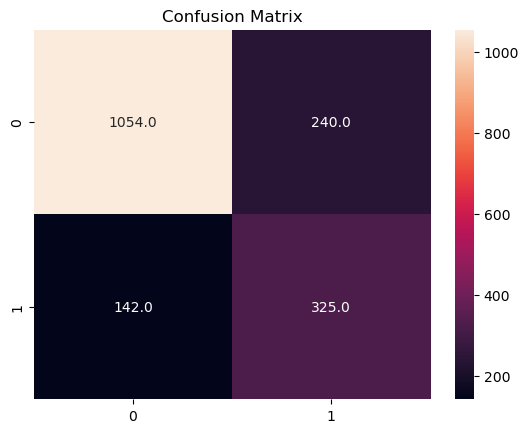

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".1f")
plt.title("Confusion Matrix")
plt.show()